# Figure 4: Scatterplot of EOF Loadings / Clusters

In [1]:
# Import Python modules
import os, sys
from pathlib import Path
import numpy as np
import pandas as pd
import xarray as xr
# matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib.colors import ListedColormap
from matplotlib import rcParams
# plot styles/formatting
import seaborn as sns

In [2]:
# Set path to module directory
sys.path.append('/home/sbarc/students/montini/repos/sallj-types/modules/')


In [3]:
# Set up Paths
home = Path.home()                  # users home directory
root = home/'repos'/'sallj-types'   # project root directory
path_to_data = root/'data'          # project data -- read only
path_to_out  = root/'out'           # output files (numerical results, intermediate datafiles) -- read & write
path_to_figs = root/'figs'          # figures


In [4]:
# Set default font for all plots
rcParams['font.family'] = 'sans-serif'   # set the default font family to 'sans-serif'
rcParams['font.sans-serif'] = 'Arial'    # set the default sans-serif font to 'Arial'


## Import Data

In [5]:
# Loadings & LLJ CAT
filepath = path_to_out / 'sallj-types-loadings.csv'
df = pd.read_csv(filepath)
df.head()


,Unnamed: 0,LOC,EOF1,EOF2,EOF3,EOF4,LLJ_CAT
0,1979-11-07 09:00:00,SC/MA,-0.099419,0.528249,-0.392154,0.134632,4
1,1979-11-08 09:00:00,SC/MA,0.695522,0.155527,-0.111101,-0.073872,2
2,1979-11-13 09:00:00,SC/MA,0.371877,-0.087766,0.030848,-0.327514,2
3,1979-11-17 09:00:00,SC/MA,-0.291732,0.336498,-0.246718,0.090430,4
4,1979-11-18 09:00:00,SC/MA,0.580645,0.257607,-0.163964,-0.142541,2


In [6]:
# Load centroid data

infile = path_to_out / 'centroids.txt'
data = np.loadtxt(infile, delimiter=',')
centroids = data[:,1:5]
print(centroids)


[[-0.05482688 -0.38555062 -0.07973267  0.02958012]
 [ 0.41485832  0.02399044  0.14194943 -0.02064471]
 [-0.38948858  0.09639416  0.19001468 -0.02069029]
 [ 0.01152753  0.31639859 -0.25750668  0.03453993]]


In [7]:
# Save data to numpy arrays

# 1d array of llj cats
llj_cat = df['LLJ_CAT'].to_numpy()

# array sizes
ntot = len(llj_cat)
neof = 4

# 2d array of loadings
loadings = np.empty((ntot, neof))
loadings[:,0] = df['EOF1']
loadings[:,1] = df['EOF2']
loadings[:,2] = df['EOF3']
loadings[:,3] = df['EOF4']
print(loadings)

[[-0.09941906  0.52824868 -0.3921545   0.13463232]
 [ 0.69552222  0.15552693 -0.11110126 -0.07387229]
 [ 0.37187661 -0.08776586  0.03084753 -0.3275136 ]
 ...
 [ 0.77303305  0.36702511  0.04242833  0.11943545]
 [-0.62342371  0.08973197  0.18179063 -0.2988246 ]
 [-0.46264496  0.3617578  -0.12111721  0.21150441]]


## Figure

In [8]:
# Define colors for clusters

color_array = np.array(([4/256, 133/256, 155/256, 1], # blue
                        [122/256, 141/256, 57/256, 1], # green
                       [239/256, 86/256, 69/256, 1],  # coral
                       [254/256, 188/256, 17/256, 1]))  # gold

# color_array = np.array(([59/256, 143/256, 179/256, 1], # blue
#                         [128/256, 160/256, 53/256, 1], # green
#                        [179/256, 59/256, 143/256, 1],  # purple/magenta
#                        [179/256, 95/256, 59/256, 1]))  # orange

newcmap = ListedColormap(color_array)

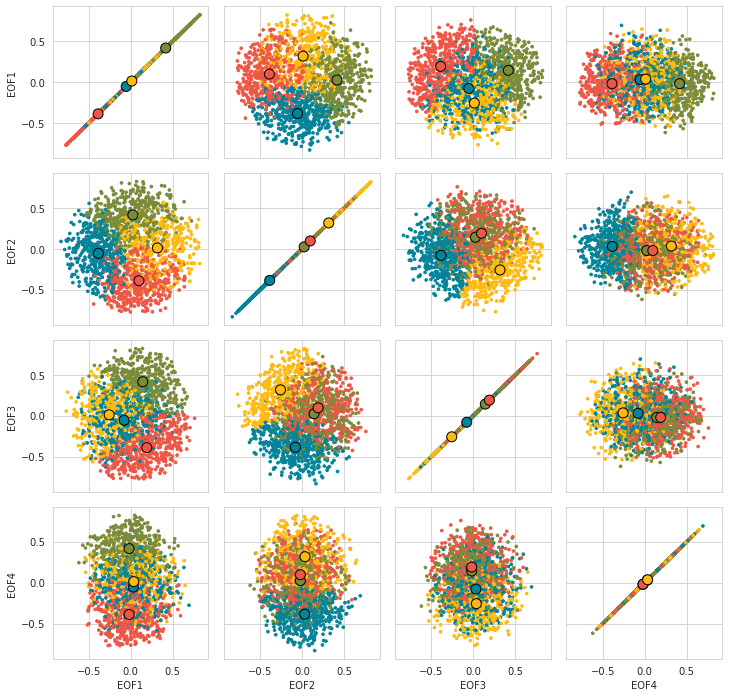

In [28]:
# Panel of Scatter Plots: 4 x 4

# plot style
sns.set_style('whitegrid')

# fig layout
nrows = 4
ncols = 4
nplots = nrows*ncols

# eof labels
eof_label = ['EOF1','EOF2','EOF3','EOF4']
# centroids (?)
cent_llj_cat = [0, 1, 2, 3]

# tickmarks
ticks = np.arange(-0.9,0.91,0.3)
xmin = -0.89
xmax = 0.89
ymin = xmin
ymax = xmax

# dot sizes
dotsize = 7
ctrsize = 100

# create figure with multiple axes
fig = plt.figure(figsize=(12,12))
axs = fig.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True)

# minimize white space between plots
fig.subplots_adjust(hspace=0.1, wspace=0.1)   # default=0.2

# loop to draw plots
for i in range(nrows):
    for j in range(ncols):
        # scatterplot
        s = axs[i,j].scatter(loadings[:,i], loadings[:,j], 
                             s=dotsize, c=llj_cat, cmap=newcmap)
        # centroids
        c = axs[i,j].scatter(centroids[:,i], centroids[:,j], 
                             s=ctrsize, c=cent_llj_cat, cmap=newcmap, edgecolors='black')
        
        # shared axis labels
        if j == 0:
            axs[i,j].set_ylabel(eof_label[i])
        if i == 3:
            axs[i,j].set_xlabel(eof_label[j])
        
        
plt.show()



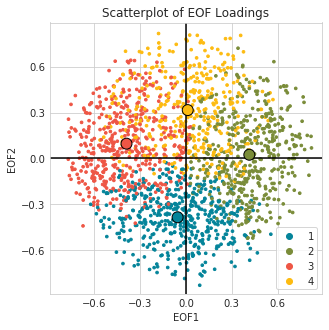

In [10]:
## scatter plot (single plot)

sns.set_style('whitegrid')
eof_label = ['EOF1','EOF2','EOF3','EOF4']
cent_llj_cat = [0, 1, 2, 3]

nplots=1
fig, ax = plt.subplots(1, nplots, figsize=(11,5))
dotsize=7
centersize = 120

# set for all plots
ticks = np.arange(-0.9,0.91,0.3)
#for k in range(nplots):
ax.set_aspect('equal', 'box')
ax.axhline(color='black')
ax.axvline(color='black')
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.tick_params(axis='both', pad=1)
ax.set_xlim(-0.89,0.89)
ax.set_ylim(-0.89,0.89)

# plot 1: EOF1 v. EOF2
i=0; j=1
s1 = ax.scatter(loadings[:,i], loadings[:,j], s=dotsize, c=llj_cat, cmap=newcmap)
c1 = ax.scatter(centroids[:,i], centroids[:,j], s=centersize, 
               c=cent_llj_cat, cmap=newcmap, edgecolors='black', zorder=10)
ax.set_xlabel(eof_label[i])
ax.set_ylabel(eof_label[j])
legend = ax.legend(*s1.legend_elements(), loc='lower right', borderpad=0.25, labelspacing=0.3)
ax.set_title('Scatterplot of EOF Loadings')


# save fig
#filepath = home/'Desktop' / 'scatter.png'
#plt.savefig(filepath, bbox_inches='tight', dpi=200)

plt.show()


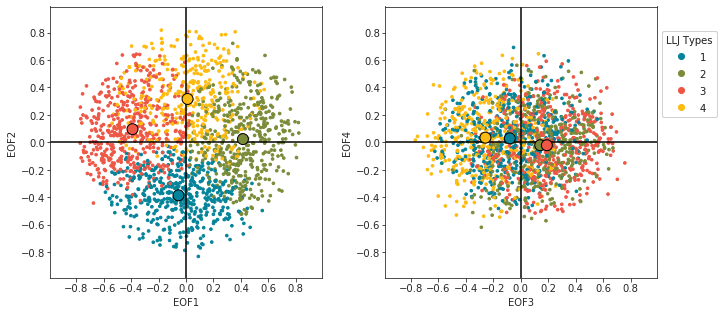

In [11]:
## Two Plots ## -- from original

# sns.set_style('ticks')
# eof_label = ['EOF1','EOF2','EOF3','EOF4']
# cent_llj_cat = [0, 1, 2, 3]

# nplots=2
# fig, ax = plt.subplots(1, nplots, figsize=(11,5))
# dotsize=7
# centersize = 120

# # set for all plots
# ticks = np.arange(-0.8,0.81,0.2)
# for k in range(nplots):
#     ax[k].set_aspect('equal', 'box')
#     ax[k].axhline(color='black')
#     ax[k].axvline(color='black')
#     ax[k].set_xticks(ticks)
#     ax[k].set_yticks(ticks)
#     ax[k].tick_params(axis='both', pad=1)
#     ax[k].set_xlim(-0.99,0.99)
#     ax[k].set_ylim(-0.99,0.99)

# # plot 1: EOF1 v. EOF2
# i=0; j=1
# s1 = ax[0].scatter(loadings[:,i], loadings[:,j], s=dotsize, c=llj_cat, cmap=newcmap)
# c1 = ax[0].scatter(centroids[:,i], centroids[:,j], s=centersize, 
#                c=cent_llj_cat, cmap=newcmap, edgecolors='black', zorder=10)
# ax[0].set_xlabel(eof_label[i])
# ax[0].set_ylabel(eof_label[j])

# # plot 2: EOF2 v. EOF3
# i=2; j=3
# s2 = ax[1].scatter(loadings[:,i], loadings[:,j], s=dotsize, c=llj_cat, cmap=newcmap)
# c2 = ax[1].scatter(centroids[:,i], centroids[:,j], s=centersize, c=cent_llj_cat, 
#                    cmap=newcmap, edgecolors='black', zorder=10)
# ax[1].set_xlabel(eof_label[i])
# ax[1].set_ylabel(eof_label[j])

# # legend
# legend = ax[1].legend(*s2.legend_elements(), title='LLJ Types',
#                       bbox_to_anchor=(1.02, 0.91), loc='upper left', 
#                       borderaxespad=0.)
# ax[1].add_artist(legend)

# nplots=2
# for k in range(nplots):
#     ax[k].set_aspect('equal', 'box')
#     ax[k].set_xticks(ticks)
#     ax[k].set_yticks(ticks)
#     ax[k].tick_params(axis='both', pad=1)

# # save fig
# #filepath = path_to_figs / 'fig4.png'
# #plt.savefig(filepath, bbox_inches='tight', dpi=150)

# plt.show()
